<a href="https://colab.research.google.com/github/Thonyta17/Econ-5200/blob/main/Lab%203/Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Define Economies: PRY (Paraguay), UMC (Upper Middle Income), WLD (World)
country_codes = ['PRY','UMC','WLD']

indicators = {
  "NY.GDP.PCAP.CD" : 'GDP_Per_Capita_Const',  #Standard of Living
  'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending

}

In [8]:
#1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000,2025))

#2.Transpose (Flip Rows/Cols)
df = df_raw.T

#3. Clean Index
df.index = df.index.str.replace('YR','').astype(int)
df.index.name = 'Year'

#4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

#5. Extract Guatemala for specific calculations
df_pry = df.xs('PRY', axis=1, level=0). copy()


Fetching data...


In [9]:
#1. Natural Rate of Unemploument (5-Year MA)
df_pry['Natural_Rate_Unemp']= df_pry['Unemployment_Rate'].rolling(window=5).mean()

#2. Productivity (Output per worker)
df_pry['productivity']=df_pry['GDP_Const']/df_pry['Labor_Force_Total']

#3. Net Capital Outflow (Exports - Imports)
df_pry['NCO'] = df_pry['Exports_GDP']-df_pry['Imports_GDP']

#4.Budget Balance (Tax - Spending)
df_pry['Budget_Balance']=df_pry['Tax_Rev_GDP']-df_pry['Gov_Exp_GDP']

Visualization

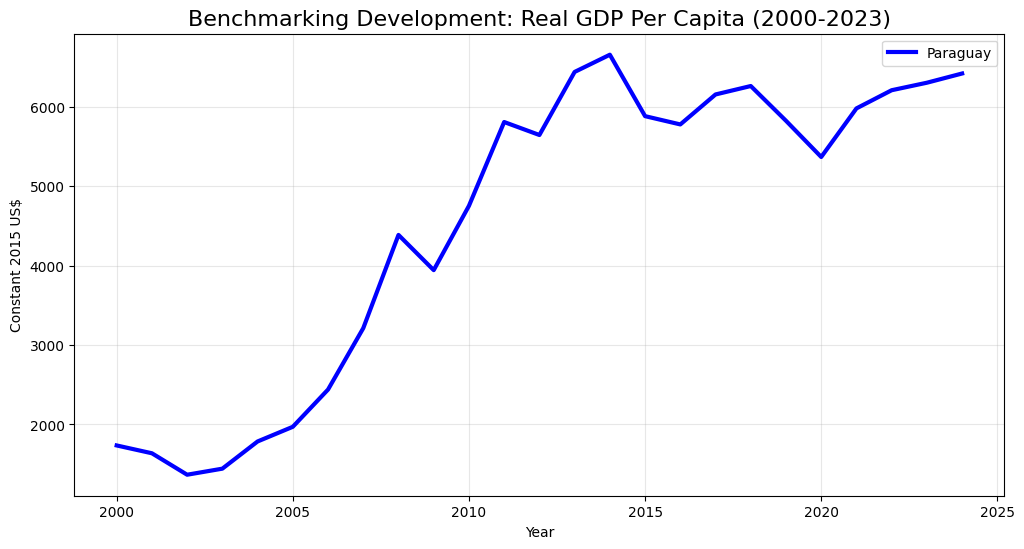

In [10]:
#exercise 1: PRY only

plt.figure(figsize=(12,6))
#Plot only Paraguay
plt.plot(df.index, df[('PRY','GDP_Per_Capita_Const')],label='Paraguay', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha =0.3)
plt.show()

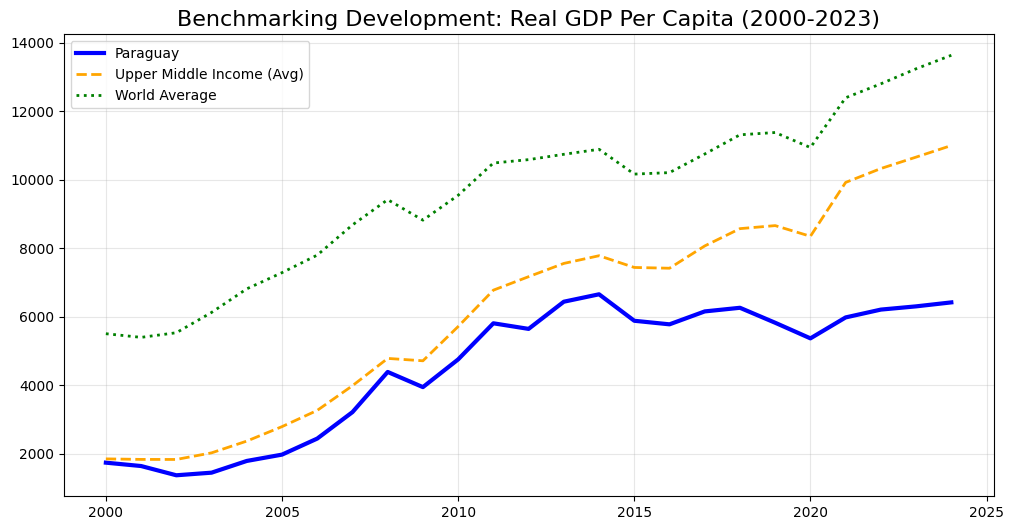

In [11]:
#Ex2: the full picture
plt.figure(figsize=(12,6))
plt.plot(df.index,df[('PRY','GDP_Per_Capita_Const')], label='Paraguay', color='blue', linewidth=3)

#Add these lines
plt.plot(df.index, df[('UMC','GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color= 'orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD','GDP_Per_Capita_Const')], label='World Average', color = 'green', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


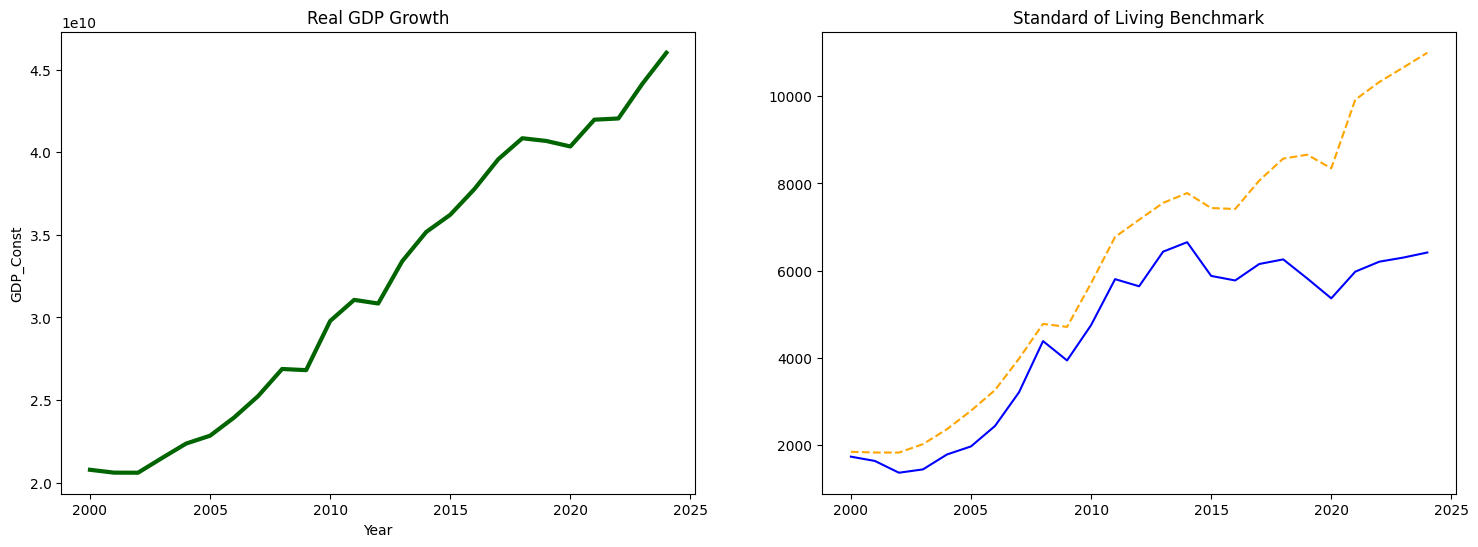

In [17]:
#Ex3: Wealth & Growth (Subplots)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))

#Chart A: Total GDP
sns.lineplot(data=df_pry, x=df_pry.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

#Chart B: GDP Per Capital Benchmark
ax2.plot(df.index, df[('PRY', 'GDP_Per_Capita_Const')],color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

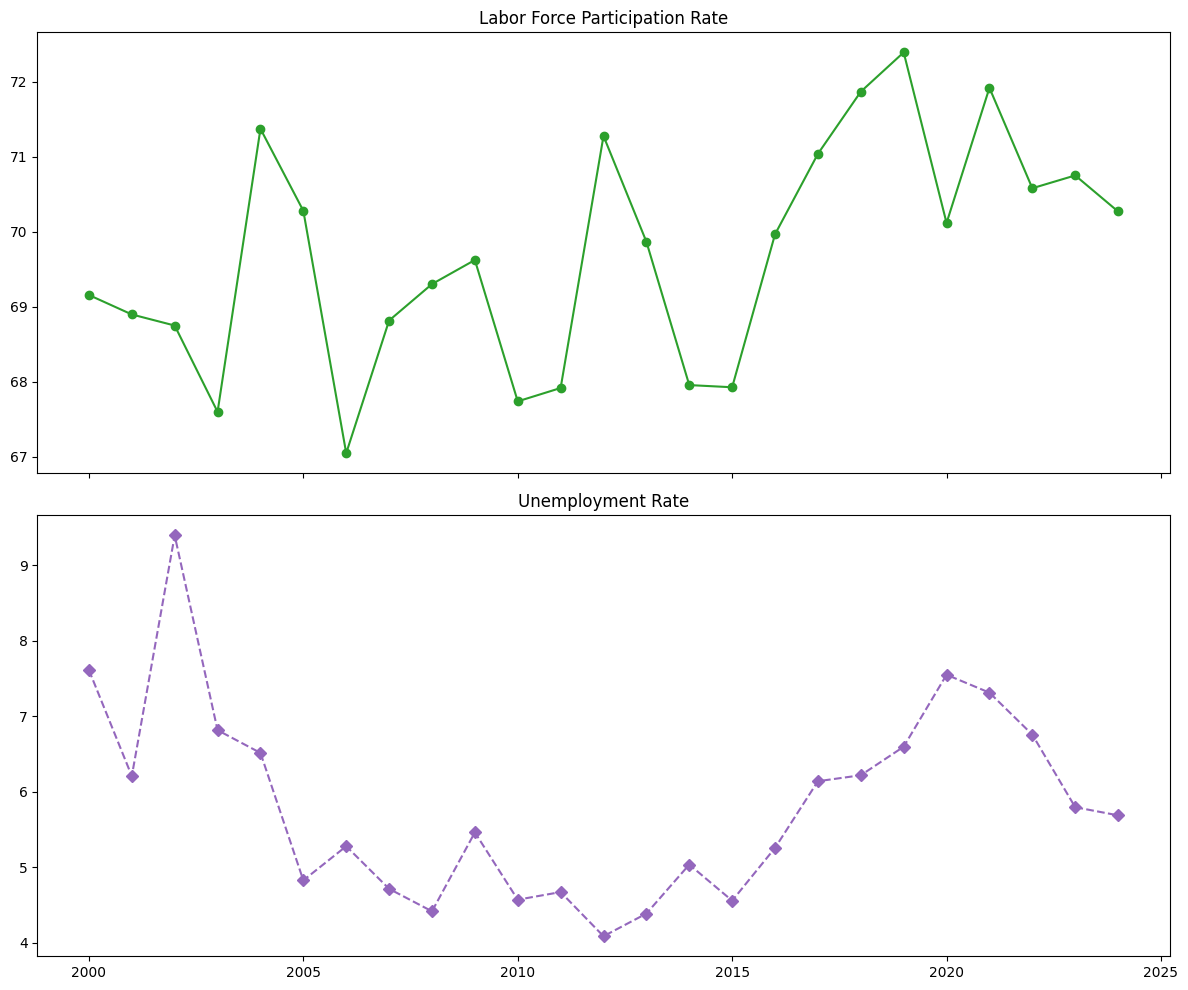

In [20]:
#Ex4: Labor Market (Vertical Comparison)
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,10), sharex=True)

#Top: Participation
ax1.plot(df_pry.index, df_pry['Labor_Part_Rate'], color='tab:green', marker="o")
ax1.set_title("Labor Force Participation Rate")

#Bottom: Unemployment
ax2.plot(df_pry.index, df_pry["Unemployment_Rate"], color='tab:purple', marker="D", linestyle='--')
ax2.set_title("Unemployment Rate")
plt.tight_layout()
plt.show()

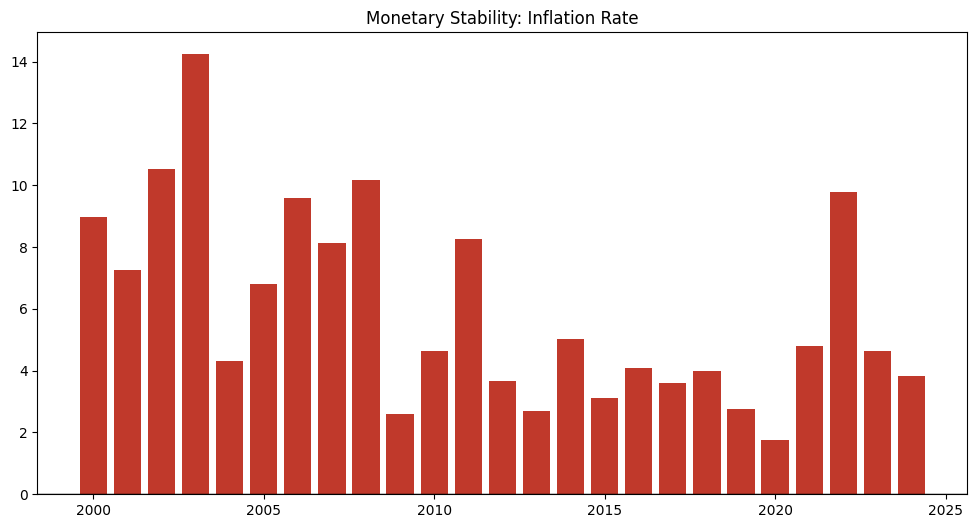

In [22]:
#Ex5: Inflation
plt.figure(figsize=(12,6))

plt.bar(df_pry.index, df_pry['Inflation_CPI'], color = '#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title("Monetary Stability: Inflation Rate")
plt.show()

Text(0.5, 1.0, 'Capital Accumulation')

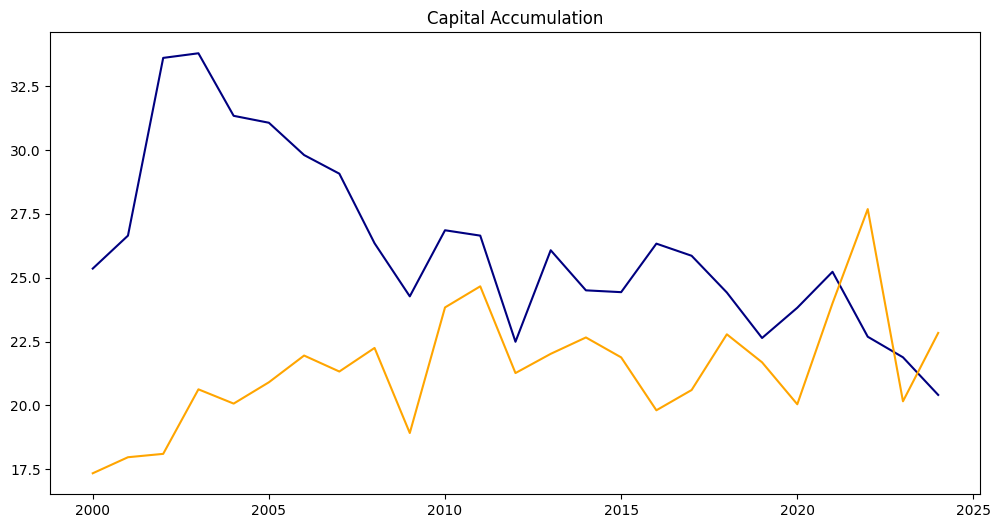

In [24]:
#Ex 6: Savings & Investment
plt.figure(figsize=(12,6))
plt.plot(df_pry.index, df_pry['Gross_Dom_Savings'], label='Savings', color = 'navy')
plt.plot(df_pry.index, df_pry['Gross_Cap_Formation'], label='Investment', color = 'orange')
plt.title('Capital Accumulation')

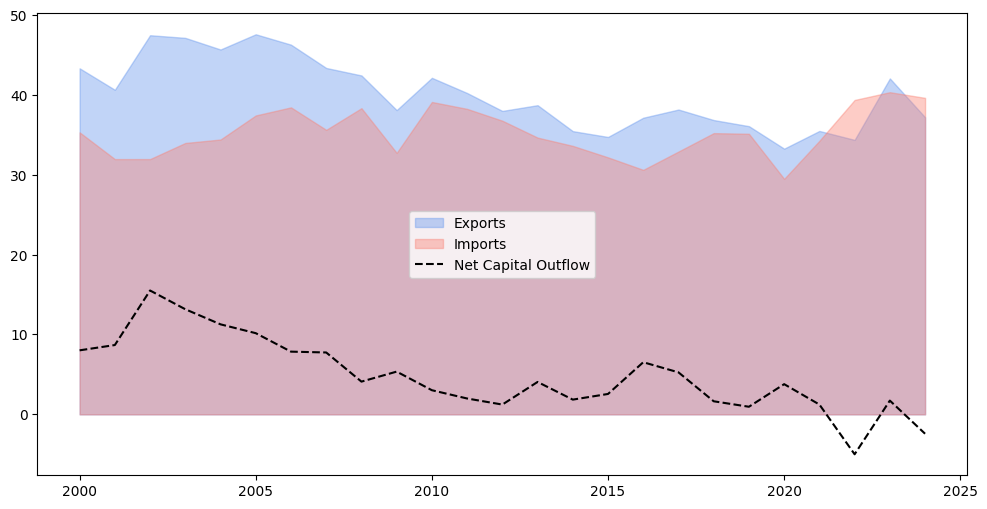

In [26]:
#Ex 7: Trade Balance & NCO
plt.figure(figsize=(12,6))
plt.fill_between(df_pry.index, df_pry['Exports_GDP'], color='cornflowerblue', alpha=0.4,label='Exports')
plt.fill_between(df_pry.index, df_pry['Imports_GDP'], color='salmon', alpha = 0.4, label='Imports')
plt.plot(df_pry.index, df_pry['NCO'], color='black', linestyle="--",label="Net Capital Outflow")
plt.legend()
plt.show()

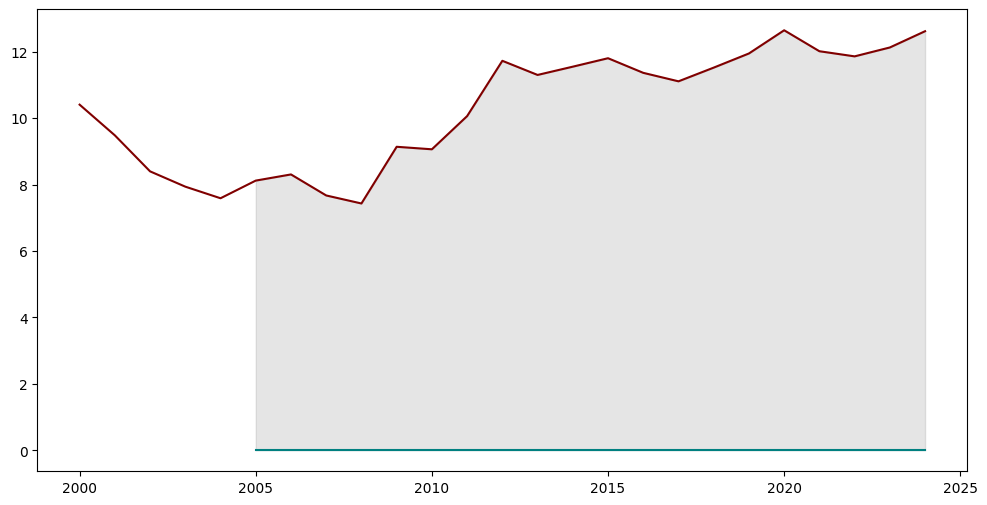

In [29]:
#Ex8: Fiscal Policy
plt.figure(figsize =(12,6))
plt.plot(df_pry.index, df_pry['Tax_Rev_GDP'], color='teal', label='Revenue')
plt.plot(df_pry.index, df_pry['Gov_Exp_GDP'], label="Expenditure", color='maroon')
plt.fill_between(df_pry.index, df_pry['Tax_Rev_GDP'], df_pry['Gov_Exp_GDP'], color='gray', alpha = 0.2)
plt.show()

Phase 3: Data Literacy (The Bad & The Ugly)
Warning: These next two charts demonstrate how to manipulate data. Do not use these methods in your dashboard.

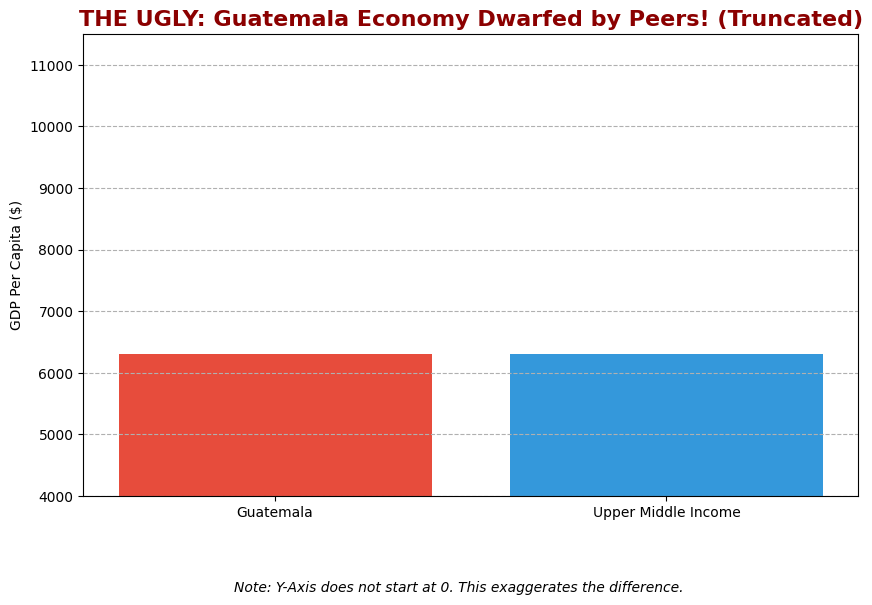

In [32]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
pry_val = df.loc[snapshot_year, ('PRY', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [pry_val, pry_val]
labels = ['Guatemala', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Guatemala is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Guatemala Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

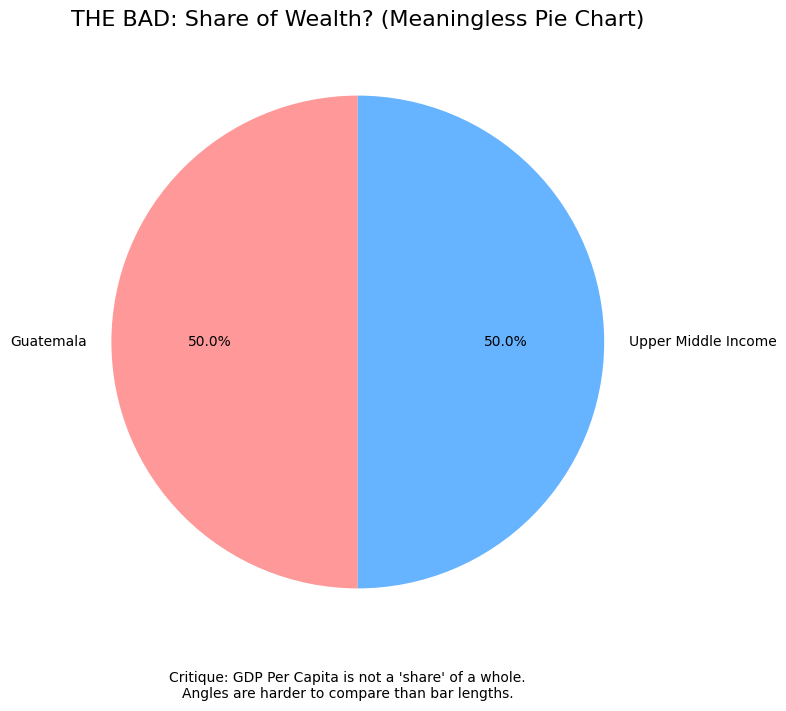

In [33]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

# Task
Create a 2x3 executive dashboard with six plots as specified, using `df_pry` DataFrame, Matplotlib, and Seaborn. Apply 'dark_background' style, a main title, and `plt.tight_layout()`.

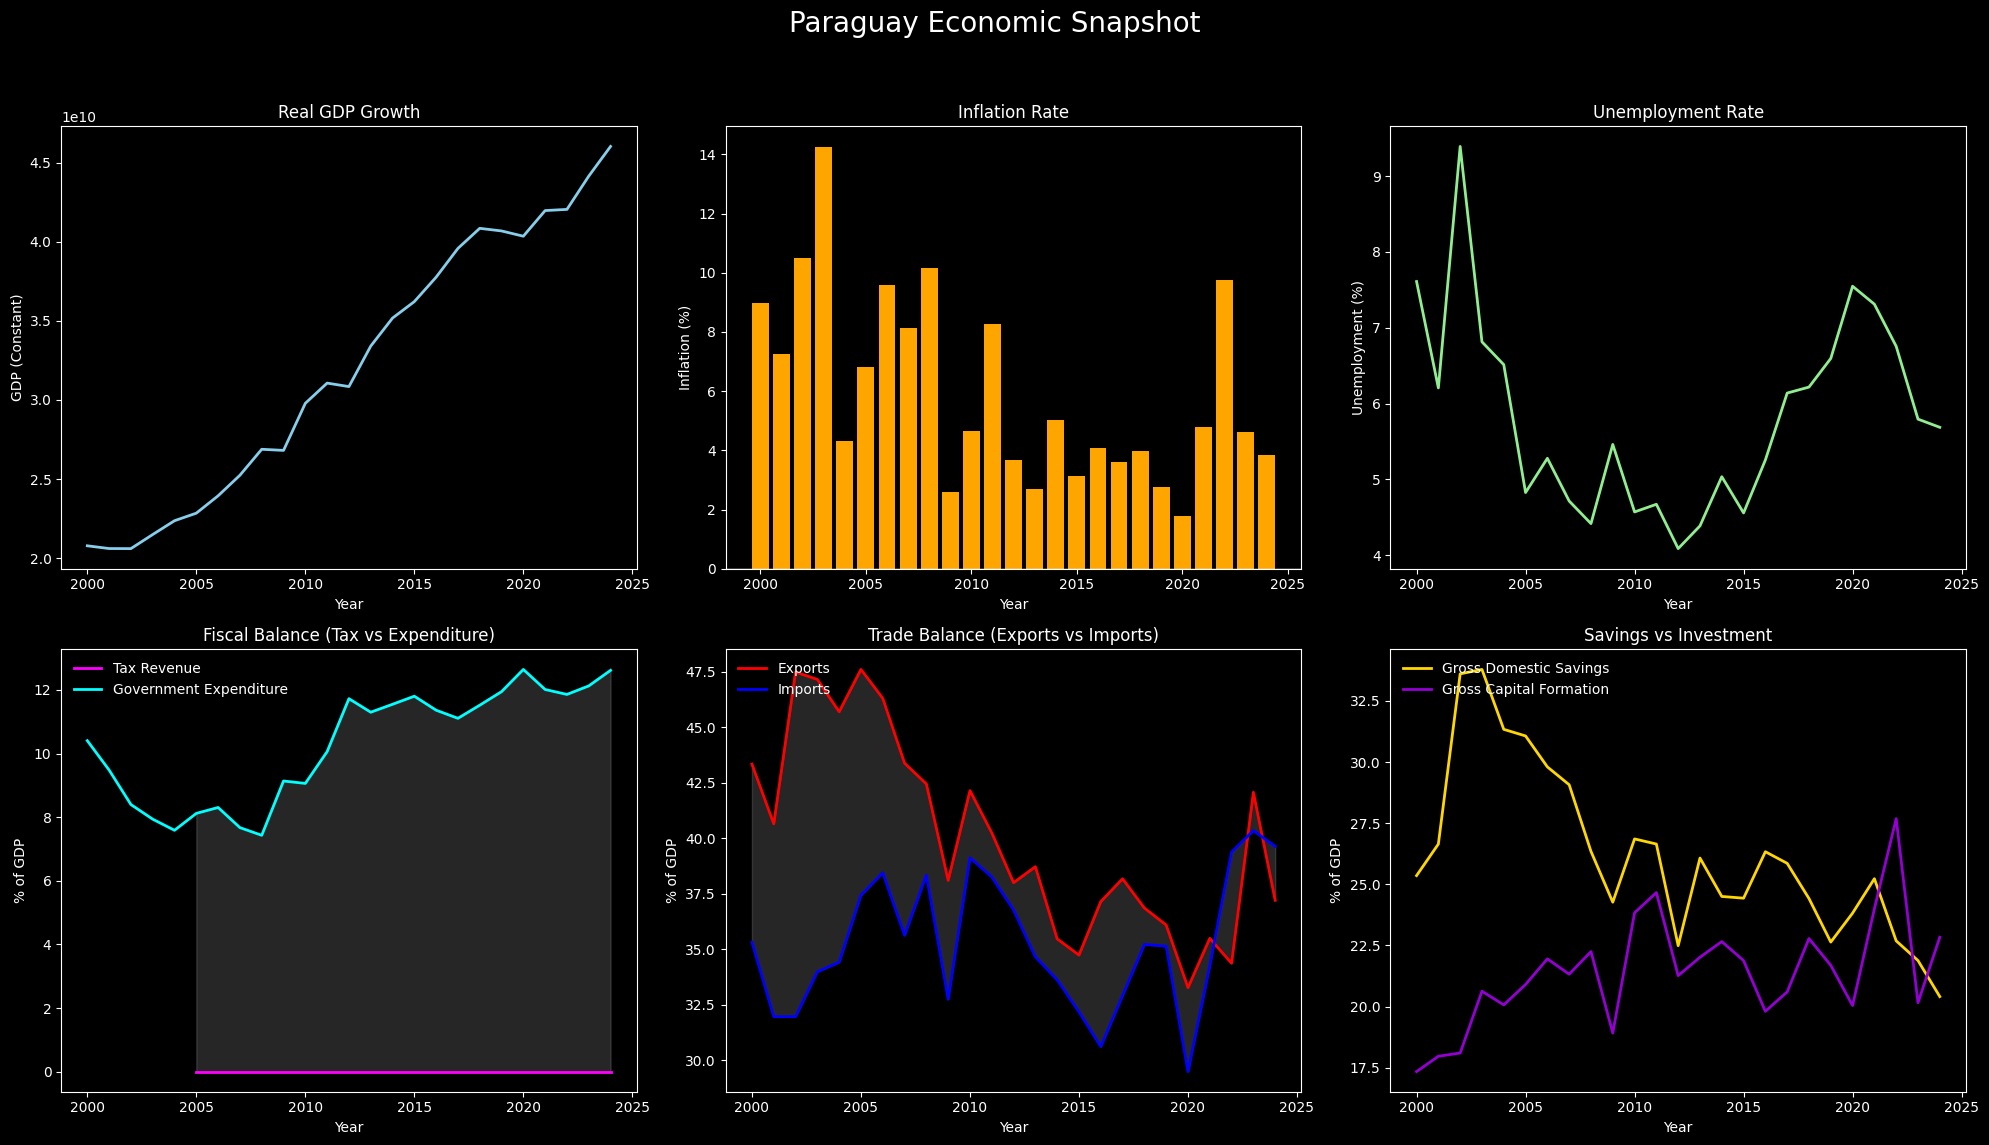

In [35]:
plt.style.use('dark_background')

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Paraguay Economic Snapshot', fontsize=20, color='white')

# Plot 1: Real GDP
sns.lineplot(data=df_pry, x=df_pry.index, y='GDP_Const', ax=axes[0, 0], color='skyblue', linewidth=2)
axes[0, 0].set_title('Real GDP Growth', color='white')
axes[0, 0].set_xlabel('Year', color='white')
axes[0, 0].set_ylabel('GDP (Constant)', color='white')
axes[0, 0].tick_params(axis='x', colors='white')
axes[0, 0].tick_params(axis='y', colors='white')
axes[0, 0].spines['bottom'].set_color('white')
axes[0, 0].spines['left'].set_color('white')

# Plot 2: Inflation Rate
axes[0, 1].bar(df_pry.index, df_pry['Inflation_CPI'], color='orange')
axes[0, 1].axhline(0, color='white', linewidth=1)
axes[0, 1].set_title('Inflation Rate', color='white')
axes[0, 1].set_xlabel('Year', color='white')
axes[0, 1].set_ylabel('Inflation (%)', color='white')
axes[0, 1].tick_params(axis='x', colors='white')
axes[0, 1].tick_params(axis='y', colors='white')
axes[0, 1].spines['bottom'].set_color('white')
axes[0, 1].spines['left'].set_color('white')

# Plot 3: Unemployment Rate
sns.lineplot(data=df_pry, x=df_pry.index, y='Unemployment_Rate', ax=axes[0, 2], color='lightgreen', linewidth=2)
axes[0, 2].set_title('Unemployment Rate', color='white')
axes[0, 2].set_xlabel('Year', color='white')
axes[0, 2].set_ylabel('Unemployment (%)', color='white')
axes[0, 2].tick_params(axis='x', colors='white')
axes[0, 2].tick_params(axis='y', colors='white')
axes[0, 2].spines['bottom'].set_color('white')
axes[0, 2].spines['left'].set_color('white')

# Plot 4: Fiscal Balance (Tax Revenue vs Gov Expenditure)
axes[1, 0].plot(df_pry.index, df_pry['Tax_Rev_GDP'], label='Tax Revenue', color='magenta', linewidth=2)
axes[1, 0].plot(df_pry.index, df_pry['Gov_Exp_GDP'], label='Government Expenditure', color='cyan', linewidth=2)
axes[1, 0].fill_between(df_pry.index, df_pry['Tax_Rev_GDP'], df_pry['Gov_Exp_GDP'], color='gray', alpha=0.3)
axes[1, 0].set_title('Fiscal Balance (Tax vs Expenditure)', color='white')
axes[1, 0].set_xlabel('Year', color='white')
axes[1, 0].set_ylabel('% of GDP', color='white')
axes[1, 0].legend(loc='upper left', frameon=False, labelcolor='white')
axes[1, 0].tick_params(axis='x', colors='white')
axes[1, 0].tick_params(axis='y', colors='white')
axes[1, 0].spines['bottom'].set_color('white')
axes[1, 0].spines['left'].set_color('white')

# Plot 5: Trade Balance (Exports vs Imports)
axes[1, 1].plot(df_pry.index, df_pry['Exports_GDP'], label='Exports', color='red', linewidth=2)
axes[1, 1].plot(df_pry.index, df_pry['Imports_GDP'], label='Imports', color='blue', linewidth=2)
axes[1, 1].fill_between(df_pry.index, df_pry['Exports_GDP'], df_pry['Imports_GDP'], color='gray', alpha=0.3)
axes[1, 1].set_title('Trade Balance (Exports vs Imports)', color='white')
axes[1, 1].set_xlabel('Year', color='white')
axes[1, 1].set_ylabel('% of GDP', color='white')
axes[1, 1].legend(loc='upper left', frameon=False, labelcolor='white')
axes[1, 1].tick_params(axis='x', colors='white')
axes[1, 1].tick_params(axis='y', colors='white')
axes[1, 1].spines['bottom'].set_color('white')
axes[1, 1].spines['left'].set_color('white')

# Plot 6: Savings vs Investment
axes[1, 2].plot(df_pry.index, df_pry['Gross_Dom_Savings'], label='Gross Domestic Savings', color='gold', linewidth=2)
axes[1, 2].plot(df_pry.index, df_pry['Gross_Cap_Formation'], label='Gross Capital Formation', color='darkviolet', linewidth=2)
axes[1, 2].set_title('Savings vs Investment', color='white')
axes[1, 2].set_xlabel('Year', color='white')
axes[1, 2].set_ylabel('% of GDP', color='white')
axes[1, 2].legend(loc='upper left', frameon=False, labelcolor='white')
axes[1, 2].tick_params(axis='x', colors='white')
axes[1, 2].tick_params(axis='y', colors='white')
axes[1, 2].spines['bottom'].set_color('white')
axes[1, 2].spines['left'].set_color('white')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

## create_executive_dashboard

### Subtask:
Generate a 2x3 executive dashboard with six plots as specified, using `df_pry` DataFrame, Matplotlib, and Seaborn. Apply 'dark_background' style, a main title, and `plt.tight_layout()`.


## Summary:

### Data Analysis Key Findings
No data analysis has been performed yet as the current step involves setting up the visualization framework.

### Insights or Next Steps
*   Proceed with implementing the specified plots (e.g., 'Total Amount per Year', 'Total Amount by Payment Method', 'Average Amount per Year', 'Average Amount by Payment Method', 'Number of Transactions per Year', and 'Number of Transactions by Payment Method') within the defined dashboard structure.
*   Ensure all plots effectively communicate their respective insights using appropriate chart types and clear labeling.
